# Description

* `GLD` represent the gold price.
* `SLV` represent the silver price.

### *`By` Yousif Mujtaba, Aug 2023*

# The Dependencies

In [55]:
print('hi yaz')

hi yaz


In [56]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

# Data Manipulation

In [57]:
data = pd.read_csv('C:/Users/Staff/OneDrive/Desktop/Yousif/Datasets/Gold Prices/GoldPrices.csv')

In [58]:
data.head()

,Date,SPX,GLD,USO,SLV,EUR/USD
0,1/2/2008,1447.160034,84.860001,78.470001,15.180,1.471692
1,1/3/2008,1447.160034,85.570000,78.370003,15.285,1.474491
2,1/4/2008,1411.630005,85.129997,77.309998,15.167,1.475492
3,1/7/2008,1416.180054,84.769997,75.500000,15.053,1.468299
4,1/8/2008,1390.189941,86.779999,76.059998,15.590,1.557099


In [59]:
data.shape

(2290, 6)

In [60]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2290 entries, 0 to 2289
Data columns (total 6 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Date     2290 non-null   object 
 1   SPX      2290 non-null   float64
 2   GLD      2290 non-null   float64
 3   USO      2290 non-null   float64
 4   SLV      2290 non-null   float64
 5   EUR/USD  2290 non-null   float64
dtypes: float64(5), object(1)
memory usage: 107.5+ KB


In [61]:
data.describe()

,SPX,GLD,USO,SLV,EUR/USD
count,2290.000000,2290.000000,2290.000000,2290.000000,2290.000000
mean,1654.315776,122.732875,31.842221,20.084997,1.283653
std,519.111540,23.283346,19.523517,7.092566,0.131547
min,676.530029,70.000000,7.960000,8.850000,1.039047
25%,1239.874969,109.725000,14.380000,15.570000,1.171313
50%,1551.434998,120.580002,33.869999,17.268500,1.303297
75%,2073.010070,132.840004,37.827501,22.882500,1.369971
max,2872.870117,184.589996,117.480003,47.259998,1.598798


# Data Preprocessing

In [62]:
data.select_dtypes(include='object')

,Date
0,1/2/2008
1,1/3/2008
2,1/4/2008
3,1/7/2008
4,1/8/2008
...,...
2285,5/8/2018
2286,5/9/2018
2287,5/10/2018
2288,5/14/2018


### DateTime Transformation

Splitting the Date column into multiple columns : `Day`, `Month`, and `Year`.

In [63]:
day_data = pd.to_datetime(data['Date'], format='%m/%d/%Y').dt.day

In [64]:
day_data.rename('Day', inplace=True)

0        2
1        3
2        4
3        7
4        8
        ..
2285     8
2286     9
2287    10
2288    14
2289    16
Name: Day, Length: 2290, dtype: int32

In [65]:
month_data = pd.to_datetime(data['Date'], format='%m/%d/%Y').dt.month

In [66]:
month_data.rename('Month', inplace=True)

0       1
1       1
2       1
3       1
4       1
       ..
2285    5
2286    5
2287    5
2288    5
2289    5
Name: Month, Length: 2290, dtype: int32

In [67]:
year_data = pd.to_datetime(data['Date'], format='%m/%d/%Y').dt.year

In [68]:
year_data.rename('Year', inplace=True)

0       2008
1       2008
2       2008
3       2008
4       2008
        ... 
2285    2018
2286    2018
2287    2018
2288    2018
2289    2018
Name: Year, Length: 2290, dtype: int32

In [69]:
time_data = pd.concat([day_data, month_data, year_data], axis=1)

In [70]:
time_data

,Day,Month,Year
0,2,1,2008
1,3,1,2008
2,4,1,2008
3,7,1,2008
4,8,1,2008
...,...,...,...
2285,8,5,2018
2286,9,5,2018
2287,10,5,2018
2288,14,5,2018


In [71]:
data = pd.concat([data, time_data], axis=1)

In [72]:
data.drop('Date', axis=1, inplace=True)

In [73]:
data

,SPX,GLD,USO,SLV,EUR/USD,Day,Month,Year
0,1447.160034,84.860001,78.470001,15.1800,1.471692,2,1,2008
1,1447.160034,85.570000,78.370003,15.2850,1.474491,3,1,2008
2,1411.630005,85.129997,77.309998,15.1670,1.475492,4,1,2008
3,1416.180054,84.769997,75.500000,15.0530,1.468299,7,1,2008
4,1390.189941,86.779999,76.059998,15.5900,1.557099,8,1,2008
...,...,...,...,...,...,...,...,...
2285,2671.919922,124.589996,14.060000,15.5100,1.186789,8,5,2018
2286,2697.790039,124.330002,14.370000,15.5300,1.184722,9,5,2018
2287,2723.070068,125.180000,14.410000,15.7400,1.191753,10,5,2018
2288,2730.129883,124.489998,14.380000,15.5600,1.193118,14,5,2018


# EDA

## Correlations

In [74]:
corr_mat = data.corr()

In [75]:
corr_mat

,SPX,GLD,USO,SLV,EUR/USD,Day,Month,Year
SPX,1.000000,0.049345,-0.591573,-0.274055,-0.672017,-0.001525,-0.023432,0.944403
GLD,0.049345,1.000000,-0.186360,0.866632,-0.024375,-0.000198,0.020494,0.206654
USO,-0.591573,-0.186360,1.000000,0.167547,0.829317,-0.007988,-0.047335,-0.775765
SLV,-0.274055,0.866632,0.167547,1.000000,0.321631,-0.000206,-0.011976,-0.172485
EUR/USD,-0.672017,-0.024375,0.829317,0.321631,1.000000,0.002122,-0.012100,-0.791655
Day,-0.001525,-0.000198,-0.007988,-0.000206,0.002122,1.000000,0.005550,-0.006307
Month,-0.023432,0.020494,-0.047335,-0.011976,-0.012100,0.005550,1.000000,-0.070903
Year,0.944403,0.206654,-0.775765,-0.172485,-0.791655,-0.006307,-0.070903,1.000000


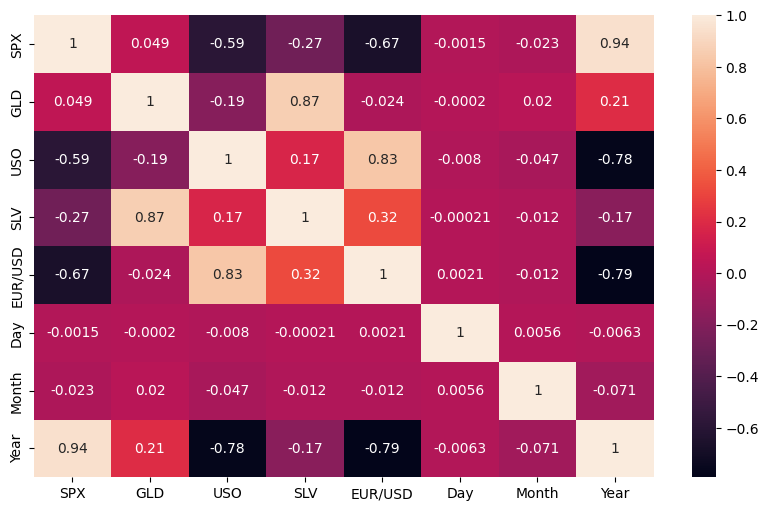

In [76]:
sns.heatmap(corr_mat, annot=True).figure.set_size_inches(10, 6)

Correlation Matrix results :
* The gold price has high positive correlation with the silver price.
* The SPX has very high positive correlation with the Year.
* The Year has high negative correlation with the EUR/USD.
* The Year has high negative correlation with the USO.

Next will be searching the features individually.

## Time Series

Text(0.5, 1.0, 'Years Distribution')

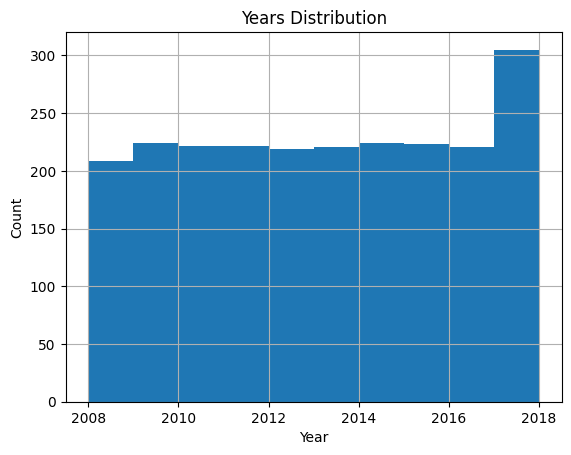

In [77]:
data['Year'].hist()
plt.xlabel('Year')
plt.ylabel('Count')
plt.title('Years Distribution')

This figure -`Years Distribution`- shows the times that the gold prices were measured and recorded in each year, for instance, the year 2018 has the highest number of measurements records. So this is a clarification of the way the data was documented.

Text(0.5, 1.0, 'Gold Price Through the Years')

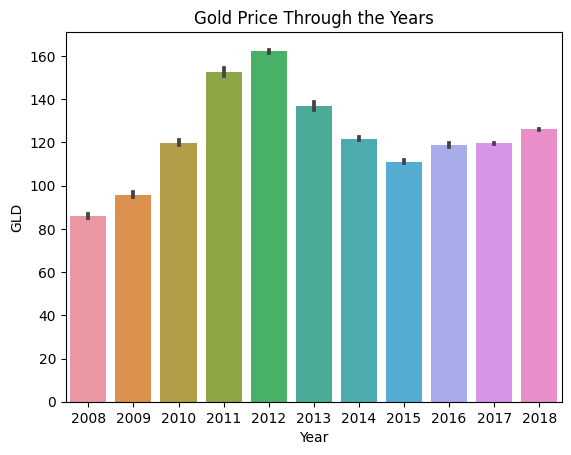

In [78]:
sns.barplot(x='Year', y='GLD', data=data)
plt.title('Gold Price Through the Years')

We can observe that the highest gold price recorded was in `2012`.      
Its also obvious that the gold prices took an increasing curve untill it reached the peak which is `2012`, then started to decrease untill `2015`, which then took a little bit increasing curve.

Text(0.5, 1.0, 'Silver Price Through the Years')

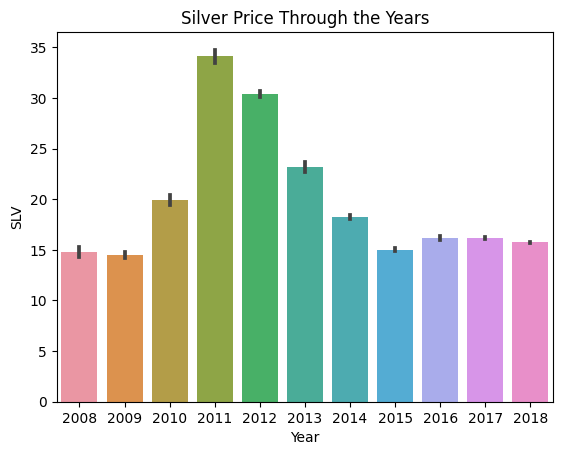

In [79]:
sns.barplot(x='Year', y='SLV', data=data)
plt.title('Silver Price Through the Years')

The peak for silver prices was in `2011`.       
Unlike the gold prices curve, the silver prices are kinda stable or less changing over time.

Text(0.5, 1.0, 'Months Distribution')

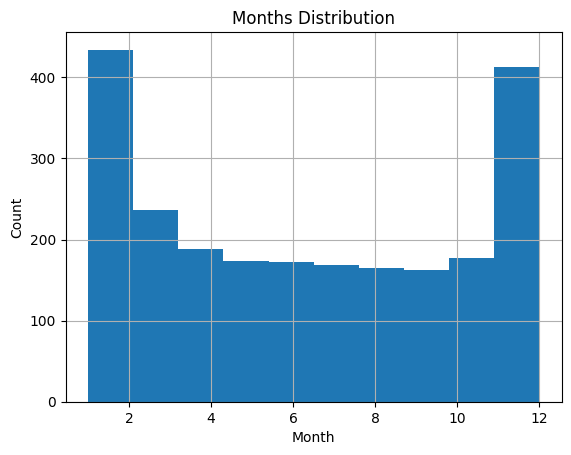

In [80]:
data['Month'].hist()
plt.xlabel('Month')
plt.ylabel('Count')
plt.title('Months Distribution')

As well as the `Years Distribution` figure, `Months Distribution` figure clarifies the data documentation procces.      
Jan and Dec have the highest measurments records.

The GLD/SLV prices through the months are quite equal so there are no meaningful patterns.

## SPX, USO, and EUR/USD 

C:\Users\Staff\AppData\Local\Temp\ipykernel_9108\1669076916.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data.SPX, color='darkgreen')


Text(0.5, 1.0, 'SPX Distribution')

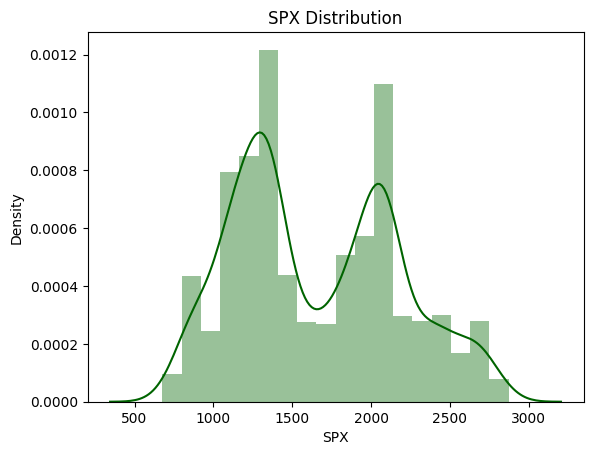

In [81]:
sns.distplot(data.SPX, color='darkgreen')
plt.title('SPX Distribution')

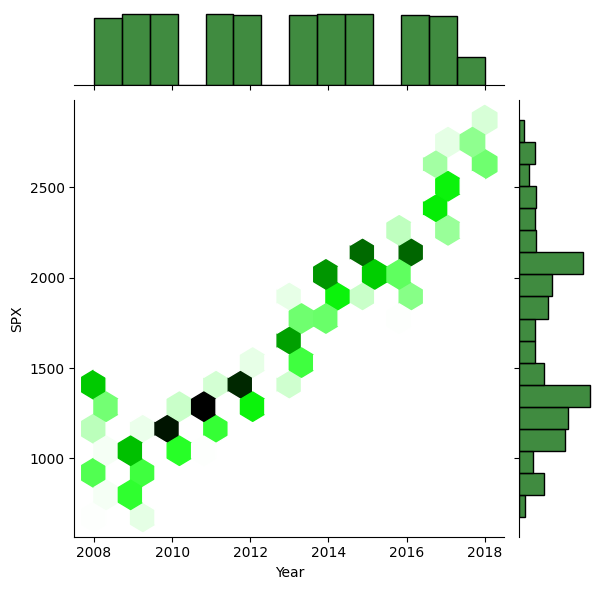

In [82]:
sns.jointplot(x='Year', y='SPX', data=data, kind='hex', color='darkgreen')

The `positively` linear relationship between the Year and SPX is pretty obvious.

C:\Users\Staff\AppData\Local\Temp\ipykernel_9108\3869059216.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data.USO, color='orange')


Text(0.5, 1.0, 'USO Distribution')

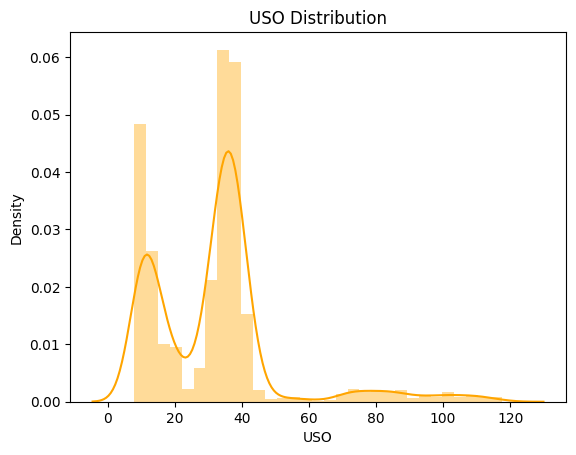

In [83]:
sns.distplot(data.USO, color='orange')
plt.title('USO Distribution')

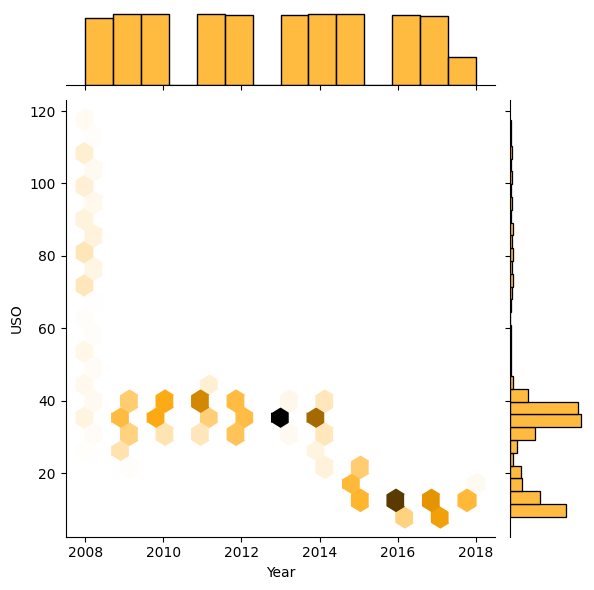

In [84]:
sns.jointplot(x='Year', y='USO', data=data, kind='hex', color='orange')

C:\Users\Staff\AppData\Local\Temp\ipykernel_9108\4072199351.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data['EUR/USD'], color='red')


Text(0.5, 1.0, 'EUR/USD Distribution')

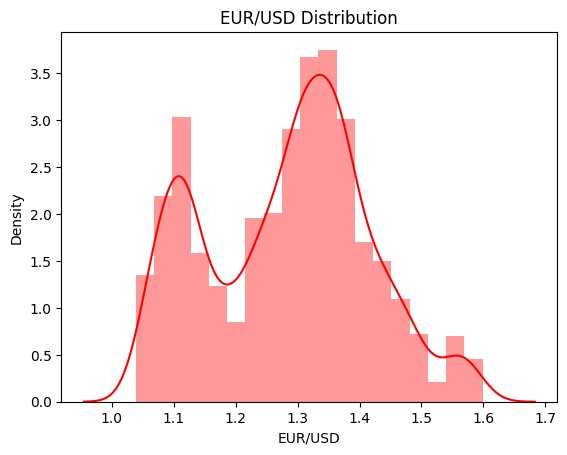

In [85]:
sns.distplot(data['EUR/USD'], color='red')
plt.title('EUR/USD Distribution')

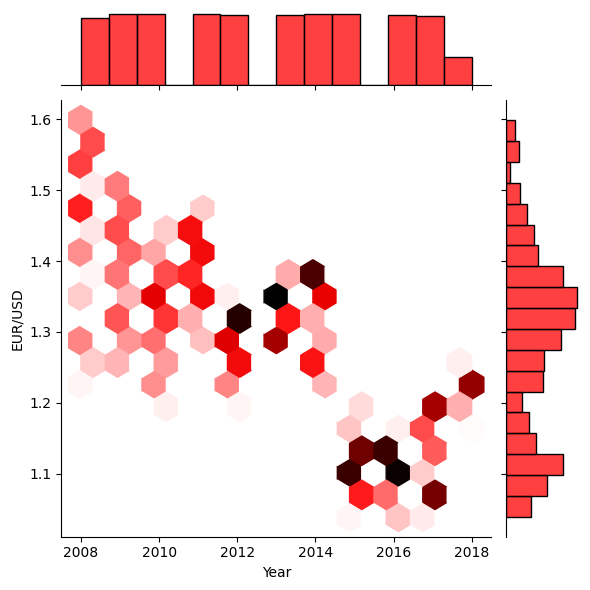

In [86]:
sns.jointplot(x='Year', y='EUR/USD', data=data, kind='hex', color='red')

The `negatively` linear relationship between the Year and EUR/USD is obvious.       
This indicates that the diffrence between Euro and Us Dollar is decreasing over time.

## Final PairPlot

A plot that shows the common and individual distributions between and for each feature.

c:\Python311\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


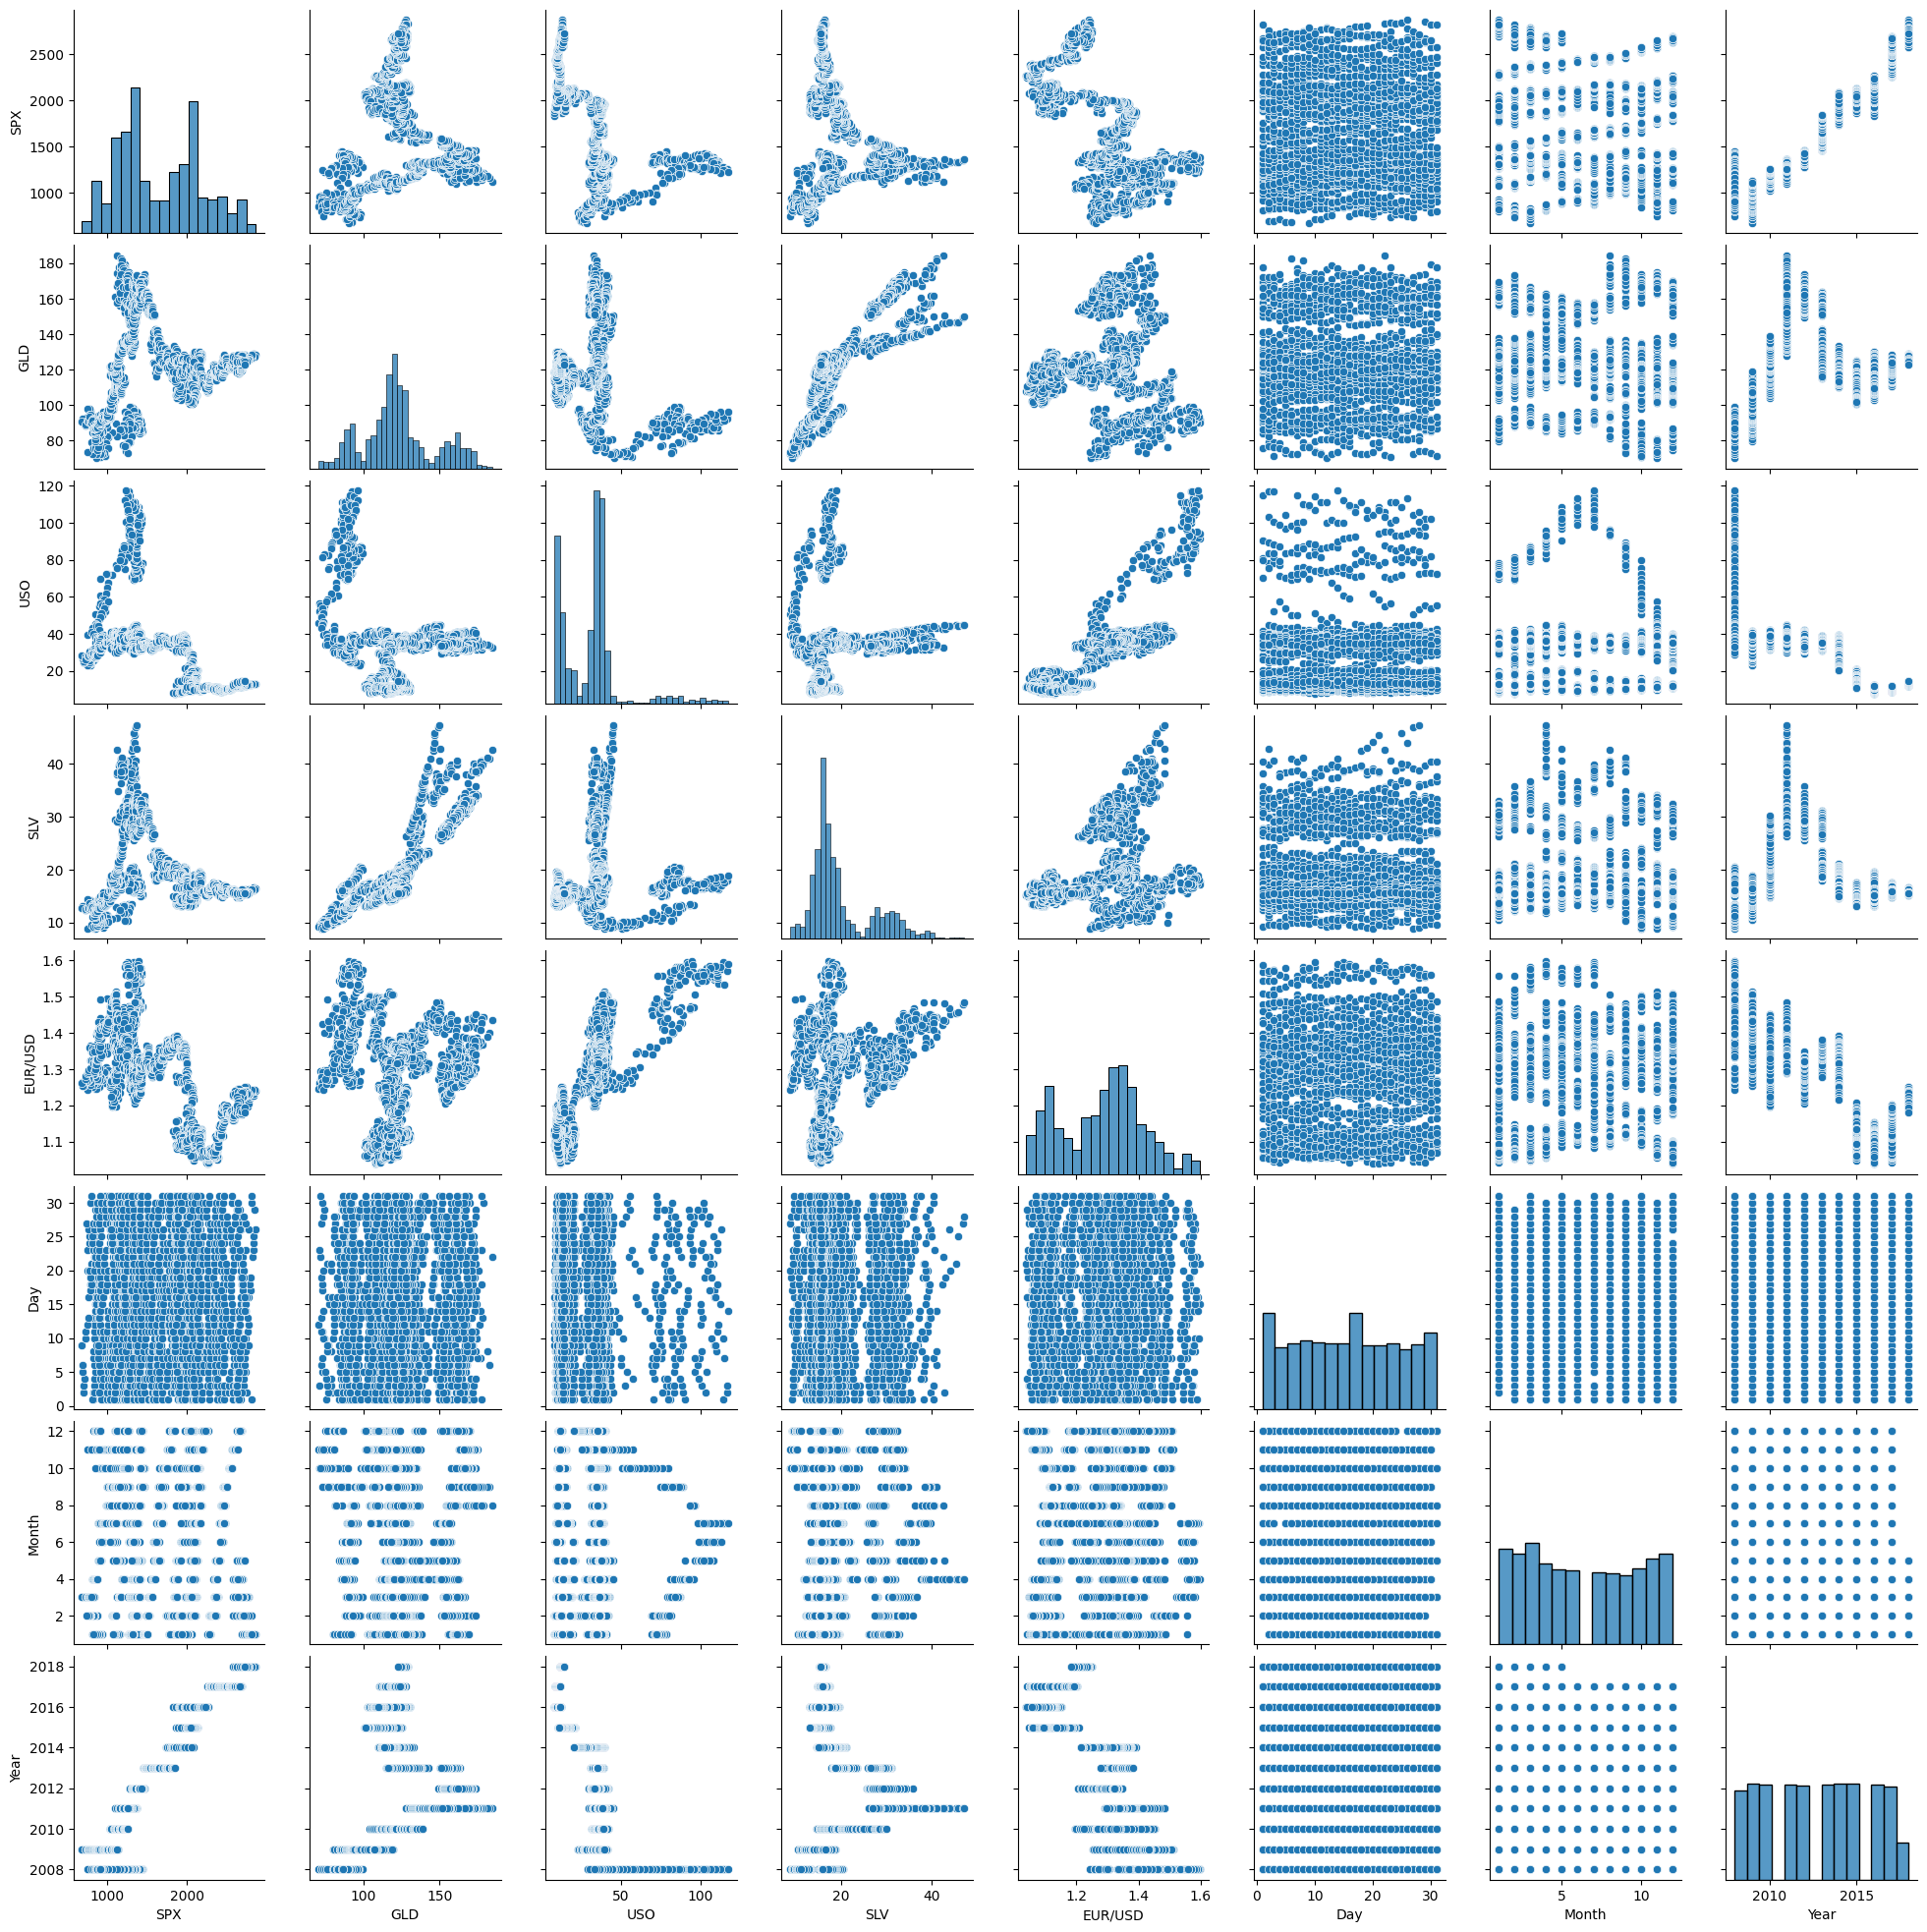

In [87]:
sns.pairplot(data)

# Modeling

We'll use diffirent ML algorithms and compare their accuracies and choose the highest one.

In [88]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor

In [89]:
lr = LinearRegression()
dt = DecisionTreeRegressor()
rf = RandomForestRegressor()

In [90]:
models = [lr, dt, rf]

In [91]:
def get_score(model, xtrain, xtest, ytrain, ytest):
    model.fit(xtrain, ytrain)
    return model.score(xtest, ytest)

In [92]:
x = data.drop('GLD', axis=1)
y = data.GLD

In [93]:
xtrain, xtest, ytrain, ytest = train_test_split(x, y, test_size=0.2, random_state=21)

In [94]:
for model in models :
    print(f'{model} accuracy is : {round(get_score(model, xtrain, xtest, ytrain, ytest)*100,1)}%')

LinearRegression() accuracy is : 90.0%
DecisionTreeRegressor() accuracy is : 99.1%
RandomForestRegressor() accuracy is : 99.5%


The highest accuratcy model was `Random Forest`, tho the rest models were performing good as well.

## Models Evaluation

We'll evaluate the models to inspect if there are any kind of bias-complexity errors, but so far we noticed that the accuracies were high, and that may indicate a probability of the model being too complex (i.e. overfitting).  
We'll use K-fold Cross Validation.

In [95]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import KFold
from sklearn.metrics import r2_score
kf = KFold(shuffle=True, n_splits=5)

Linear Regression

In [110]:
lr_scores = []
lr = LinearRegression()

for train_index, test_index in kf.split(x):
    X_train, X_test, y_train, y_test = (x.iloc[train_index, :], 
                                        x.iloc[test_index, :], 
                                        y[train_index], 
                                        y[test_index])
    
    lr.fit(X_train, y_train)
    
    y_pred = lr.predict(X_test)
    
    score = r2_score(y_test.values, y_pred)
    
    lr_scores.append(score)
    
lr_scores.append(np.mean(lr_scores))
lr_scores

[0.9189116328859175,
 0.902589432043745,
 0.9129501816376822,
 0.902278650223771,
 0.907555967010792,
 0.9088571727603816]

Decision Tree

In [109]:
dt_scores = []
dt = DecisionTreeRegressor()

for train_index, test_index in kf.split(x):
    X_train, X_test, y_train, y_test = (x.iloc[train_index, :], 
                                        x.iloc[test_index, :], 
                                        y[train_index], 
                                        y[test_index])
    
    dt.fit(X_train, y_train)
    
    y_pred = dt.predict(X_test)
    
    score = r2_score(y_test.values, y_pred)
    
    dt_scores.append(score)
    
dt_scores.append(np.mean(dt_scores))
dt_scores

[0.9934830745938127,
 0.9882740188458868,
 0.9855269248068144,
 0.9939152368127584,
 0.9929499208013497,
 0.9908298351721243]

Random Forest

In [108]:
rf_scores = []
lr = LinearRegression()

for train_index, test_index in kf.split(x):
    X_train, X_test, y_train, y_test = (x.iloc[train_index, :], 
                                        x.iloc[test_index, :], 
                                        y[train_index], 
                                        y[test_index])
    
    rf.fit(X_train, y_train)
    
    y_pred = rf.predict(X_test)
    
    score = r2_score(y_test.values, y_pred)
    
    rf_scores.append(score)
    
rf_scores.append(np.mean(rf_scores))
rf_scores

[0.9952803200024346,
 0.9961252869495376,
 0.9968094620785816,
 0.9945963026123813,
 0.9958043476675739,
 0.9957231438621017]

In [112]:
evals = pd.DataFrame({'Linear Regression':lr_scores, 'Decision Tree':dt_scores,
            'Random Forest':rf_scores}, index=['Split 1', 'Split 2', 'Split 3', 'Split 4', 'Split 5', 'Mean'])

In [113]:
evals

,Linear Regression,Decision Tree,Random Forest
Split 1,0.918912,0.993483,0.995280
Split 2,0.902589,0.988274,0.996125
Split 3,0.912950,0.985527,0.996809
Split 4,0.902279,0.993915,0.994596
Split 5,0.907556,0.992950,0.995804
Mean,0.908857,0.990830,0.995723
